In [1]:
from models import *
from functions import *

import numpy as np
import cool_maps.plot as cplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cmocean.cm as cmo

In [2]:
dates = ('2024-10-26', '2024-10-27')
depth = 1000
lon_min = -90
lon_max = -78
lat_min = 15
lat_max = 30

extent = (lat_min, lon_min, lat_max, lon_max)

In [3]:
espc = ESPC()
espc.load()
espc.subset(dates, extent, depth)
# espc.interpolated_data = interpolate_depth(espc.data)
# espc.da_data = depth_average(espc.interpolated_data)
espc.data

Loading ESPC data...
Start time (UTC): 2024-11-07 16:06:22.183607+00:00
Done.
End time (UTC): 2024-11-07 16:06:22.615836+00:00
Runtime: 0:00:00.432229

(15, 90, 30, 102)
15 90 30 102
Subsetted ESPC data.



<xarray.Dataset> Size: 4kB
Dimensions:      (depth: 33, lat: 376, lon: 151, time: 0)
Coordinates:
  * depth        (depth) float64 264B 0.0 2.0 4.0 6.0 ... 800.0 900.0 1e+03
  * lat          (lat) float64 3kB 15.0 15.04 15.08 15.12 ... 29.92 29.96 30.0
  * lon          (lon) float64 1kB 90.0 90.08 90.16 90.24 ... 101.8 101.9 102.0
  * time         (time) datetime64[ns] 0B 
    time_run     (time) datetime64[ns] 0B ...
Data variables:
    time_offset  (time) datetime64[ns] 0B ...
    u            (time, depth, lat, lon) float32 0B ...
    v            (time, depth, lat, lon) float32 0B ...
Attributes: (12/23)
    classification_level:      
    distribution_statement:    Approved for public release; distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Fleet Numerical Meteorology and Oceanography C...
    source:                    HYCOM archive file, GLBz0.04
    ...                        ...
    _CoordSysBuilder:          ucar.nc2.dataset.conv.CF1Convention
    cdm_data_type:             GRID
    featureType:               GRID
    location:                  Proto fmrc:FMRC_ESPC-D-V02_uv3z
    history:                   FMRC Best Dataset
    model:                     ESPC

In [3]:
cmems = CMEMS()
cmems.load()
cmems.subset(dates, extent, depth)
cmems.interpolated_data = interpolate_depth(cmems.data)
cmems.da_data = depth_average(cmems.interpolated_data)

Loading CMEMS data...
Start time (UTC): 2024-11-07 15:39:39.571337+00:00


Fetching catalog: 100%|██████████| 3/3 [00:22<00:00,  7.48s/it]
INFO - 2024-11-07T15:40:05Z - Dataset version was not specified, the latest one was selected: "202406"
INFO - 2024-11-07T15:40:05Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-11-07T15:40:08Z - Service was not specified, the default one was selected: "arco-geo-series"


Done.
End time (UTC): 2024-11-07 15:40:13.529283+00:00
Runtime: 0:00:33.957946

Subsetted CMEMS data.

Interpolating depth...
Start time (UTC): 2024-11-07 15:40:13.701904+00:00
Done.
End time (UTC): 2024-11-07 15:43:55.946932+00:00
Runtime: 0:03:42.245028

Depth averaging...
Start time (UTC): 2024-11-07 15:43:55.947932+00:00
Done.
End time (UTC): 2024-11-07 15:43:58.137241+00:00
Runtime: 0:00:02.189309



In [4]:
rtofs = RTOFS()
rtofs.load('east')
rtofs.subset(dates, extent, depth)
rtofs.interpolated_data = interpolate_depth(rtofs.data)
rtofs.da_data = depth_average(rtofs.interpolated_data)

Loading RTOFS data...
Start time (UTC): 2024-11-07 15:43:58.206938+00:00
Done.
End time (UTC): 2024-11-07 15:44:04.316909+00:00
Runtime: 0:00:06.109971

Subsetted RTOFS data.

Interpolating depth...
Start time (UTC): 2024-11-07 15:44:05.988117+00:00
Done.
End time (UTC): 2024-11-07 15:44:22.946743+00:00
Runtime: 0:00:16.958626

Depth averaging...
Start time (UTC): 2024-11-07 15:44:22.951461+00:00
Done.
End time (UTC): 2024-11-07 15:44:25.747296+00:00
Runtime: 0:00:02.795835



In [5]:
rtofs_common = interpolate_coords(rtofs.da_data, cmems.da_data)
rtofs_common

Interpolating coordinates...
Start time (UTC): 2024-11-07 15:44:25.799686+00:00


ValueError: Dimensions {'lat', 'lon'} do not exist. Expected one or more of FrozenMappingWarningOnValuesAccess({'y': 205, 'x': 150, 'time': 8})

In [ ]:
rtofs_da = rtofs.da_data.isel(time=0)
lon, lat = rtofs_da.lon, rtofs_da.lat # lat and lon are already 2D for RTOFS
u = rtofs_da.u
v = rtofs_da.v
mag = rtofs_da.magnitude

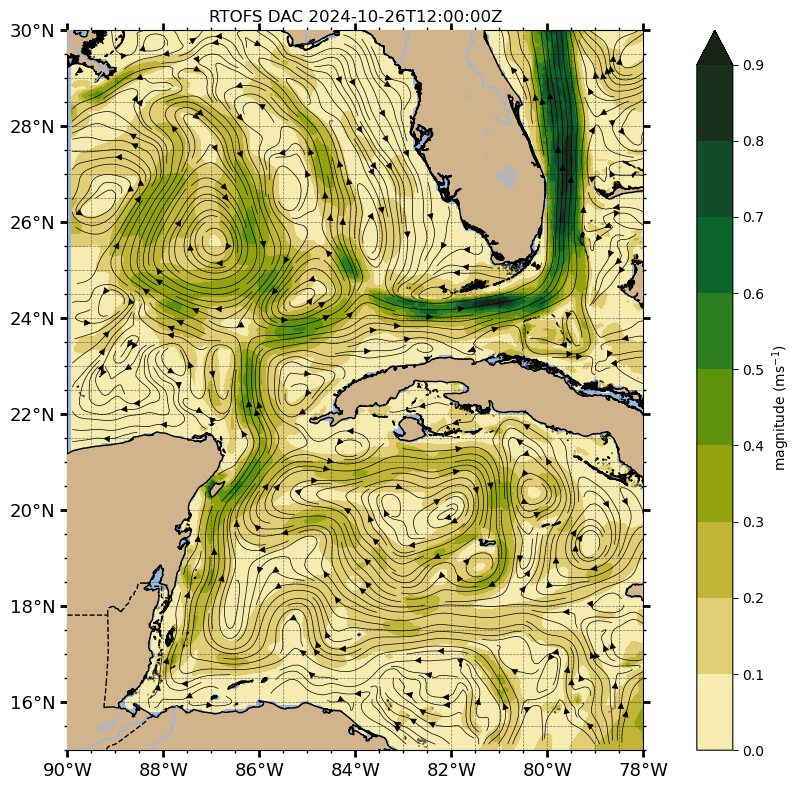

In [58]:
cplt.create([lon_min, lon_max, lat_min, lat_max], gridlines = True, proj = ccrs.PlateCarree())

contourf = plt.contourf(lon, lat, mag, levels = np.linspace(0, 0.9, 10), extend = 'max', cmap = cmo.speed, transform = ccrs.PlateCarree(), vmax=0.9)
streamplot = plt.streamplot(lon, lat, u, v, density = 4, linewidth = 0.5, color = 'black', transform = ccrs.PlateCarree())
cbar = plt.colorbar(contourf, label = 'magnitude ($\mathregular{ms^{-1}}$)')
plt.title('RTOFS DAC 2024-10-26T12:00:00Z')

plt.tight_layout();

In [ ]:
max_mag = np.nanmax(mag)
max_label = f'{max_mag:.2f}' # converts max_mag to a string with 2 decimal places

levels = [0, 0.2, 0.3, 0.4, 0.5, max_mag]
colors = ['none', 'yellow', 'orange', 'orangered', 'maroon']
labels = [None, 
          '0.2 - 0.3 $\mathregular{ms^{-1}}$',
          '0.3 - 0.4 $\mathregular{ms^{-1}}$', 
          '0.4 - 0.5 $\mathregular{ms^{-1}}$', 
          '0.5 - ' + max_label + ' $\mathregular{ms^{-1}}$']

patches = []
for color, label in zip(colors, labels):
    if label:
        patches.append(mpatches.Patch(color=color, label=label))

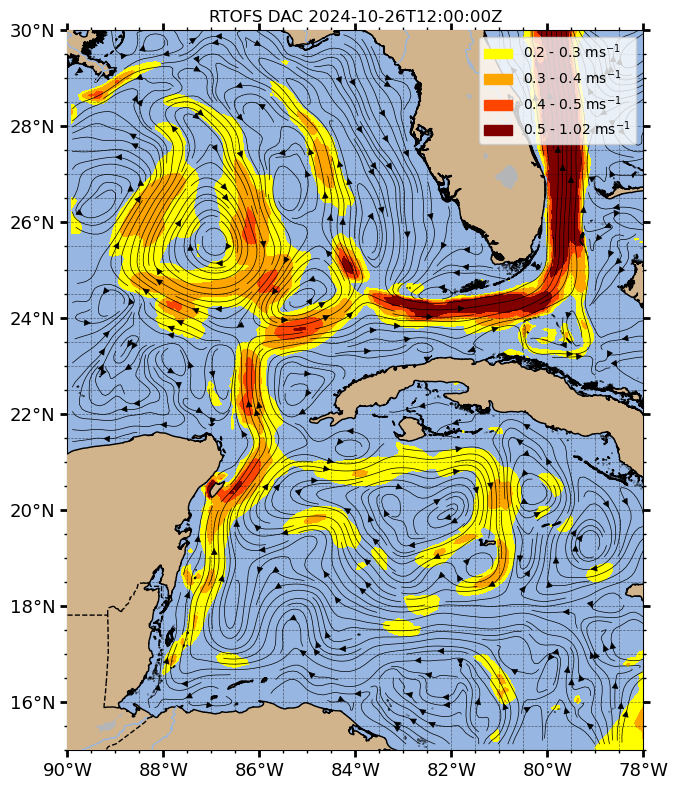

In [ ]:
cplt.create([lon_min, lon_max, lat_min, lat_max], gridlines = True, proj = ccrs.PlateCarree())

contourf = plt.contourf(lon, lat, mag, levels = levels, extend = 'both', colors = colors, transform = ccrs.PlateCarree())
streamplot = plt.streamplot(lon, lat, u, v, density = 4, linewidth = 0.5, color = 'black', transform = ccrs.PlateCarree())
legend = plt.legend(handles = patches, loc='upper right')
legend.set_zorder(100)
plt.title('RTOFS DAC 2024-10-26T12:00:00Z')

plt.tight_layout();

In [24]:
scalar = 2
u_sub = u[::scalar, ::scalar]
v_sub = v[::scalar, ::scalar]
lon_sub = lon[::scalar, ::scalar]
lat_sub = lat[::scalar, ::scalar]

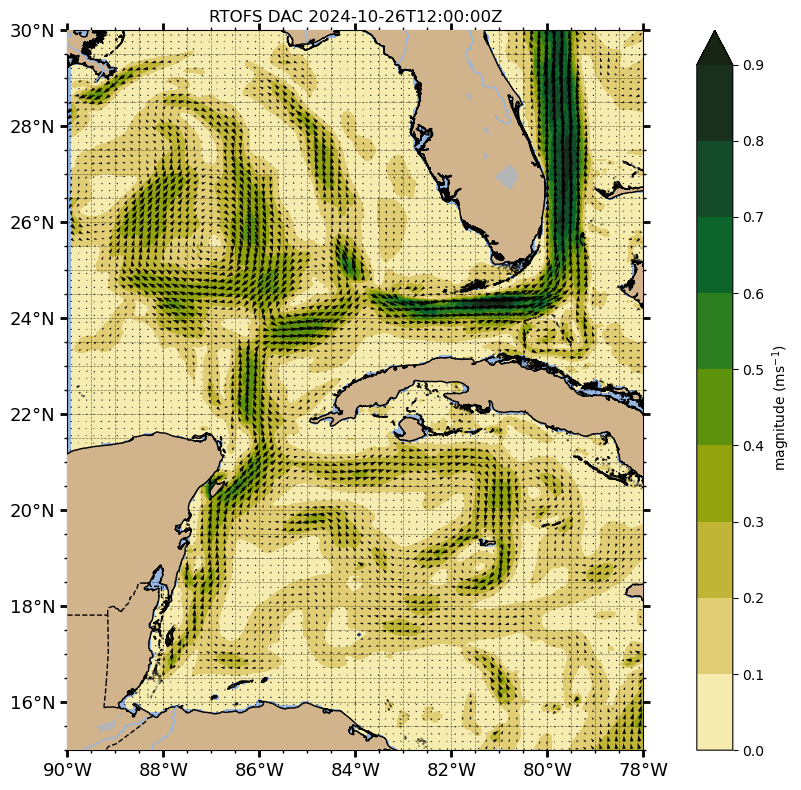

In [57]:
cplt.create([lon_min, lon_max, lat_min, lat_max], gridlines = True, proj = ccrs.PlateCarree())

contourf = plt.contourf(lon, lat, mag, levels = np.linspace(0, 0.9, 10), extend = 'max', cmap = cmo.speed, transform = ccrs.PlateCarree(), vmax=0.9)
quiver = plt.quiver(lon_sub, lat_sub, u_sub, v_sub, transform = ccrs.PlateCarree())
cbar = plt.colorbar(contourf, label = 'magnitude ($\mathregular{ms^{-1}}$)')
plt.title('RTOFS DAC 2024-10-26T12:00:00Z')

plt.tight_layout();

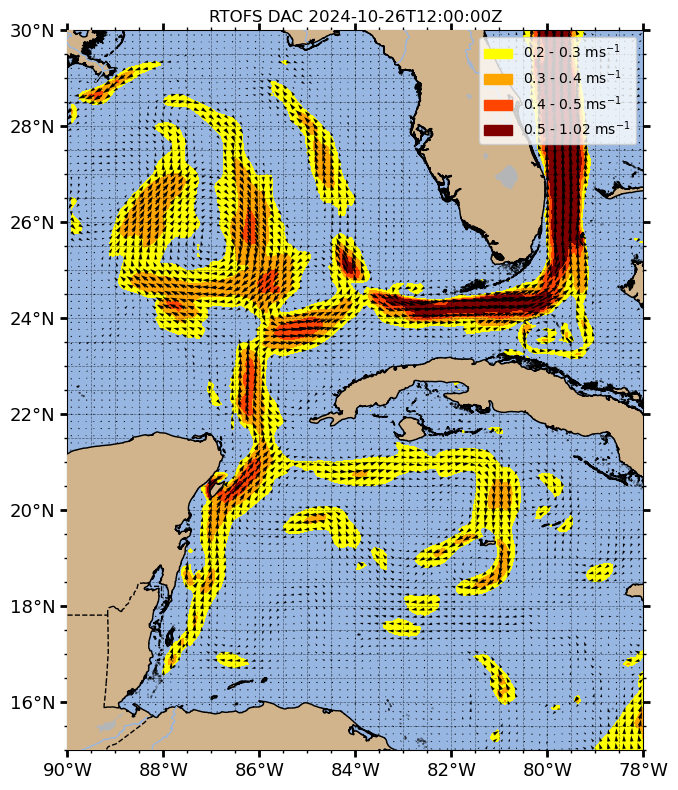

In [56]:
cplt.create([lon_min, lon_max, lat_min, lat_max], gridlines = True, proj = ccrs.PlateCarree())

contourf = plt.contourf(lon, lat, mag, levels = levels, extend = 'both', colors = colors, transform = ccrs.PlateCarree())
quiver = plt.quiver(lon_sub, lat_sub, u_sub, v_sub, transform = ccrs.PlateCarree())
legend = plt.legend(handles = patches, loc='upper right')
legend.set_zorder(100)
plt.title('RTOFS DAC 2024-10-26T12:00:00Z')

plt.tight_layout();

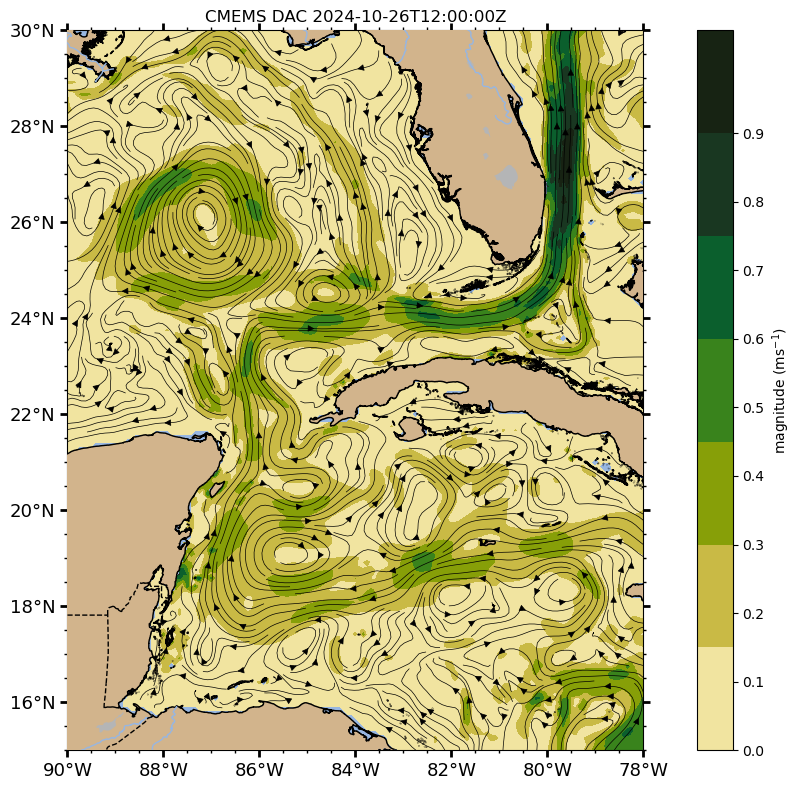

In [24]:
cplt.create([lon_min, lon_max, lat_min, lat_max], proj = ccrs.PlateCarree())

contourf = plt.contourf(lon, lat, da_mag, cmap = cmo.speed, transform = ccrs.PlateCarree(), vmax=0.9)
streamplot = plt.streamplot(lon, lat, cmems_dac.u, cmems_dac.v, density = 4, linewidth = 0.5, color = 'black', transform = ccrs.PlateCarree())
streamplot.lines.set_alpha(1.0)
cbar = plt.colorbar(contourf, label = 'magnitude ($\mathregular{ms^{-1}}$)', extend='max')
cbar.set_ticks(np.linspace(0, 0.9, 10))  # 10 tick locations
plt.title('CMEMS DAC 2024-10-26T12:00:00Z')

plt.tight_layout()